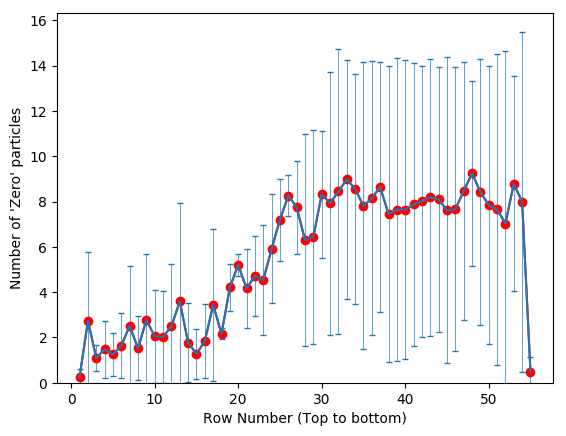

Finished

In [26]:
using Images
using JLD
using PyPlot


#dir=Dates.format(now(), "yyyy-mm-dd HH:MM:SS")
dir=rand()
rows_count=1
rows=[]

@load("grid.jld")

n_grid=55

T=1.1
J=1.0
J_A_A=1
J_B_B=0
J_C_C=1
J_A_B,J_B_A=0,0
J_C_B,J_B_C=0.99,0.99
J_C_A,J_A_C=-1,-1
#L=10
z=400
E_steps=10000000   #number of steps for Equilibrium
L=1000000    #number of steps for zero particle density calculations
P=2    #number of Production run

include("equilibration.jl")
include("production.jl")


grid,steps=Equilibration(n_grid::Int64,T::Float64,J::Float64,z,E_steps,J_B_B,J_B_A,J_B_C,J_A_B,J_A_A,J_A_C,J_C_B,J_C_A,J_C_C)

dens_mean_std=Array{Float64}(P,n_grid)

for i in 1:P
grid,dens_mean=Production(n_grid,grid,T,J,L,J_B_B,J_B_A,J_B_C,J_A_B,J_A_A,J_A_C,J_C_B,J_C_A,J_C_C)
dens_mean_std[P,:] = dens_mean
end

std_dens = std(dens_mean_std,1)
dens_mean = mean(dens_mean_std,1)

stds=Array{Float64}(2,n_grid)
stds[1,:] = std_dens
stds[2,:] = std_dens


for i in 1:n_grid
    append!(rows,rows_count)
    rows_count+=1
end

if isdefined(Symbol("grid$n_grid")) == true
   file=jldopen("grid.jld","r+")
   delete!(file,"grid$n_grid")
   write(file,"grid$n_grid",grid)
   close(file)
else
   file=jldopen("grid.jld","r+")
   write(file,"grid$n_grid",grid)
   close(file)
end

mkpath("Data/$n_grid/$dir")

plot(rows,transpose(dens_mean),"ro-")
errorbar(rows,transpose(dens_mean),yerr=stds,capsize=2,elinewidth=0.5)
ylim(ymin=0)
xlabel("Row Number (Top to bottom)")
ylabel("Number of 'Zero' particles")

savefig("Data/$n_grid/$dir/density.png")
save("Data/$n_grid/$dir/grid.png",(grid/2)+0.5)

fid=open("Data/$n_grid/$dir/sys_details.dat","w")
@printf(fid,"%s %s\r\n","Date/Time : ",Dates.format(now(), "yyyy-mm-dd HH:MM:SS"));
@printf(fid,"%s %f\r\n","J=",J);
@printf(fid,"%s %u\r\n","Lattice Size=",n_grid);
@printf(fid,"%s %f\r\n","temperature = ",T);
@printf(fid,"%s %f\r\n","Number of equilibration steps = ",E_steps);
# @printf(fid,"%s %f\r\n","Maximum temperature = ",Tmax);
# @printf(fid,"%s %f\r\n","Increment in temperature = ",Tinc);
# @printf(fid,"%s %u\r\n","No.of Production run = ",P);
#@printf(fid,"%s %u\r\n","No.of steps in production run = ",L);
# @printf(fid,"%s\r\n","Data:");
# @printf(fid,"%6s %12s %14s\r\n\r\n","r (distance)","Correlation function","Error");
close(fid)
print("Finished")

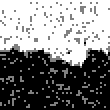

In [8]:
using Colors
Gray.((grid/2)+0.5)

In [3]:
using JLD
@load("grid.jld")

13-element Array{Symbol,1}:
 :grid10 
 :grid100
 :grid101
 :grid15 
 :grid151
 :grid153
 :grid20 
 :grid201
 :grid35 
 :grid50 
 :grid55 
 :grid65 
 :grid75 

In [24]:
dens_mean_std

4×55 Array{Float64,2}:
 1.0   1.0       0.0       1.0      …  1.0     -1.0      1.0      -1.0
 1.0   1.0       1.0      -1.0         1.0     -1.0      1.0      -1.0
 1.0  -1.0      -1.0      -1.0         1.0      1.0      1.0       1.0
 0.0   7.23088   7.13032   6.93626     7.4061   6.98372  7.20835   0.0

In [6]:
rows

10-element Array{Any,1}:
  1
  2
  3
  4
  5
  6
  7
  8
  9
 10

In [25]:
stds

2×55 Array{Float64,2}:
 0.5  3.57532  3.65746  3.75508  …  3.20305  3.77806  3.10418  0.957427
 0.5  3.57532  3.65746  3.75508     3.20305  3.77806  3.10418  0.957427